In [5]:

# Import necessary libraries
import pandas as pd  # For data manipulation
from sklearn.model_selection import train_test_split  # To split the dataset into train and test sets
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating the model
from sklearn.preprocessing import LabelEncoder  # To encode categorical features into numeric values
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs

In [6]:
# Load the dataset and specify column names
# pd.read_csv() loads the dataset from a CSV file.
# names=[] assigns column names to the dataset.
df = pd.read_csv('car_evaluation.csv', names=['buying', 'maint', 'doors', 'lug_boot', 'safety', 'class'])
# Display the dataset (initial view, can be removed in production)

In [7]:

# Encode all categorical features into numeric values
df = df.apply(LabelEncoder().fit_transform)
# LabelEncoder converts categorical text data (e.g., 'low', 'medium') into numeric form (e.g., 0, 1)

In [8]:
# Define features (X) and target (y)
X = df.drop(columns=['class'])  # Features (input variables) are all columns except 'class',which we want to predict.
y = df['class'].astype(str)  # Target (output variable), converted to string for consistency

In [9]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# test_size=0.2 means 20% of data is for testing, random_state=42 ensures consistent split


In [10]:
# Create a Random Forest Classifier model
#RandomForestClassifier() is an ensemble model that uses multiple decision trees.
model = RandomForestClassifier(n_estimators=100, random_state=42)
# n_estimators=100 specifies the number of trees in the forest
# random_state=42 ensures reproducibility of results

In [11]:
# Train the model on the training data
model.fit(X_train, y_train)
# fit() trains the model using the training dataset

RandomForestClassifier(random_state=42)

In [12]:
# Make predictions on the test data
y_pred = model.predict(X_test)
# predict() generates predictions for the test dataset

In [13]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
# accuracy_score() calculates the proportion of correct predictions

Accuracy: 0.7254335260115607


In [14]:
# Generate confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", confusion)
# confusion_matrix() shows correct and incorrect predictions per class


Confusion Matrix:
 [[ 43   5  28   7]
 [ 10   1   0   0]
 [ 28   0 207   0]
 [ 17   0   0   0]]


In [15]:
# Generate classification report
classification_rep = classification_report(y_test, y_pred)
print("\nClassification Report:\n", classification_rep)
# classification_report() provides precision, recall, and F1-score for each class


Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.52      0.48        83
           1       0.17      0.09      0.12        11
           2       0.88      0.88      0.88       235
           3       0.00      0.00      0.00        17

    accuracy                           0.73       346
   macro avg       0.37      0.37      0.37       346
weighted avg       0.71      0.73      0.72       346



In [16]:

# Determine feature importance
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
# feature_importances_ returns the importance of each feature in the model
# pd.Series() creates a labeled series of feature importance scores
# sort_values() arranges the scores in descending order

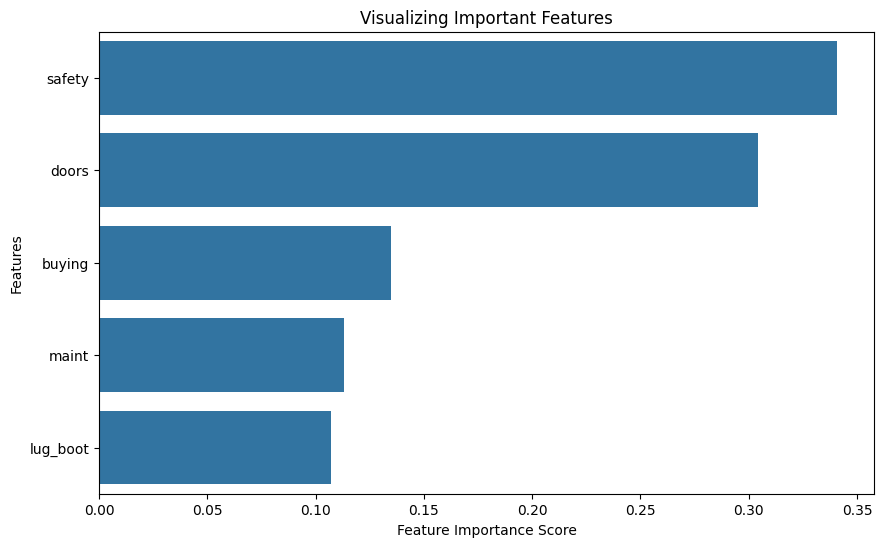

In [17]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()
# sns.barplot() creates a bar chart of feature importance scores
# plt.show() displays the plot